In [4]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from src.ksd.kernel import RBF
from src.svgd import SVGD
import tensorflow_probability as tfp
tfd = tfp.distributions
import matplotlib.pyplot as plt
from scipy.stats import norm

import numpy as np

In [15]:
X = tf.random.normal(shape=(50,1)) # num_particles x None x_dim
X = tf.Variable(X)
sigma_min = 0.01
sigma_max = 1
sigmas = tf.constant([sigma_min*100**(r/9) for r in range(0,10)], dtype=tf.float32)

In [16]:
sigmas

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544346, 0.35938138, 0.59948426, 1.        ],
      dtype=float32)>

In [17]:
p = tfd.MultivariateNormalDiag(tf.random.normal([1]))
k = RBF(sigma_sq=1)
opt = tf.keras.optimizers.Adam(learning_rate=0.1)

In [18]:
svgd = SVGD(target=p, kernel=k, sigmas=sigmas, optimizer=opt, num_samples=100)


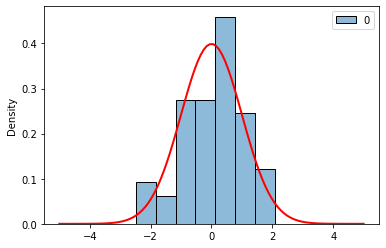

In [19]:
import seaborn as sns
ax = sns.histplot(X.numpy(), kde=False, stat='density', label='samples')
x_pdf = np.linspace(-5, 5, 100)
y_pdf = norm.pdf(x_pdf)
ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   



In [20]:
svgd.fit(X, epochs=100)

Epoch 99: 100%|██████████| 100/100 [00:31<00:00,  3.15it/s]


/home/ma/h/hbz15/fast-mcmc/.env/lib/python3.8/site-packages/numpy-1.22.0rc1-py3.8-linux-x86_64.egg/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


ZeroDivisionError: division by zero

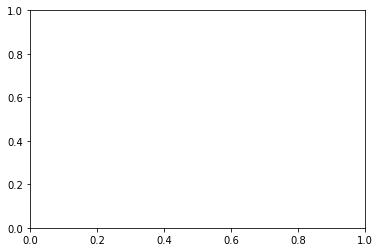

In [21]:
ax = sns.histplot(X.numpy(), kde=False, stat='density', label='samples')
x_pdf = np.linspace(-5, 5, 100)
y_pdf = norm.pdf(x_pdf)
ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   

